In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

2022-03-28 21:34:02.239052: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-28 21:34:02.239075: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
y_cat_train = to_categorical(y_train, 10)

y_cat_test = to_categorical(y_test, 10)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-03-28 21:34:43.083145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-28 21:34:43.083270: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-28 21:34:43.083351: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ali): /proc/driver/nvidia/version does not exist
2022-03-28 21:34:43.084804: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [11]:
model.fit(X_train, y_cat_train, epochs=15,
         validation_data=(X_test, y_cat_test), callbacks=[early_stop])

2022-03-28 21:34:53.959935: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/15
   6/1563 [..............................] - ETA: 38s - loss: 2.3059 - accuracy: 0.1250  

2022-03-28 21:35:16.580708: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.
2022-03-28 21:35:16.580904: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.
2022-03-28 21:35:16.589593: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18569280 exceeds 10% of free system memory.
2022-03-28 21:35:16.669250: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.


1563/1563 [==============================] - 23s 13ms/step - loss: 1.4834 - accuracy: 0.4639 - val_loss: 1.2885 - val_accuracy: 0.5465
Epoch 2/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1645 - accuracy: 0.5881 - val_loss: 1.1745 - val_accuracy: 0.5870
Epoch 3/15
1563/1563 [==============================] - 23s 14ms/step - loss: 1.0284 - accuracy: 0.6380 - val_loss: 1.0814 - val_accuracy: 0.6215
Epoch 4/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9236 - accuracy: 0.6797 - val_loss: 1.0081 - val_accuracy: 0.6492
Epoch 5/15
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8369 - accuracy: 0.7093 - val_loss: 0.9461 - val_accuracy: 0.6731
Epoch 6/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7593 - accuracy: 0.7356 - val_loss: 0.9334 - val_accuracy: 0.6811
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6850 - accuracy: 0.7606 - val_loss: 0.9468 - val_accura

In [12]:
metrics = pd.DataFrame(model.history.history)

In [13]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.483358,0.46394,1.288498,0.5465
1,1.164506,0.58806,1.174492,0.5870
2,1.028434,0.63800,1.081401,0.6215
3,0.923558,0.67966,1.008079,0.6492
4,0.836883,0.70930,0.946068,0.6731
5,0.759288,0.73558,0.933374,0.6811
6,0.685027,0.76064,0.946757,0.6815
7,0.618184,0.78278,0.986000,0.6798


In [14]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

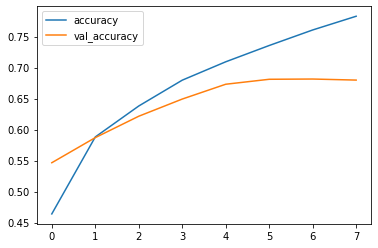

In [15]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

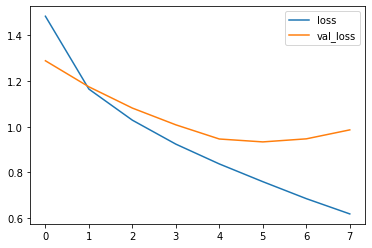

In [16]:
metrics[['loss', 'val_loss']].plot()

In [18]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9859997034072876, 0.6797999739646912]

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
predictions = model.predict(X_test)
predictions = predictions.argmax(axis=-1)

In [24]:
predictions

array([3, 8, 8, ..., 5, 1, 7])

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1000
           1       0.76      0.83      0.79      1000
           2       0.59      0.52      0.55      1000
           3       0.52      0.46      0.49      1000
           4       0.67      0.55      0.61      1000
           5       0.58      0.58      0.58      1000
           6       0.75      0.78      0.76      1000
           7       0.69      0.77      0.73      1000
           8       0.76      0.83      0.79      1000
           9       0.72      0.76      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.67      0.68      0.68     10000
weighted avg       0.67      0.68      0.68     10000



In [26]:
confusion_matrix(y_test, predictions)

array([[719,  36,  39,  14,  11,   7,  11,  14, 102,  47],
       [ 16, 833,   8,   5,   2,   7,   8,   5,  44,  72],
       [ 76,  16, 520,  70,  89,  74,  76,  36,  25,  18],
       [ 31,  23,  74, 458,  49, 178,  79,  54,  19,  35],
       [ 33,  10,  83,  69, 553,  60,  47, 106,  18,  21],
       [ 22,   7,  49, 168,  40, 580,  21,  81,  11,  21],
       [ 10,  14,  45,  52,  32,  33, 778,  10,   9,  17],
       [ 14,   7,  41,  28,  39,  48,   8, 768,   6,  41],
       [ 51,  44,   9,   9,   3,   9,   8,  11, 826,  30],
       [ 43, 107,  13,   7,   2,   7,   4,  22,  32, 763]])

<AxesSubplot:>

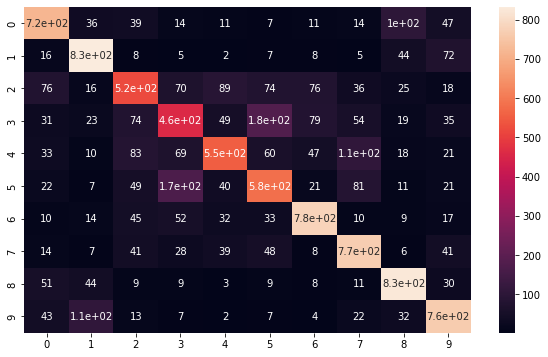

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [29]:
my_image = X_test[0]

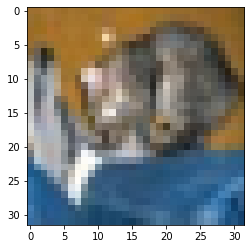

In [30]:
plt.imshow(my_image)

In [31]:
y_test[0]

array([3], dtype=uint8)

In [33]:
model.predict(my_image.reshape(1, 32, 32, 3))

array([[0.01151451, 0.00228412, 0.16488834, 0.55022836, 0.02609606,
        0.13765867, 0.0163732 , 0.03602317, 0.04923624, 0.00569729]],
      dtype=float32)